# Coloração de mapas usando algoritmo guloso

-- Explicação do algoritmo --

In [1]:
import networkx as nx
from nxpd import draw
import re
def read_graph(file):
    with open(file) as f:
        content = [line.strip('\n') for line in f.readlines()]
    grafo = []
    for linha in content[1:]:
        matchobj = re.match(r'^([^:]*): ([^.]*).', linha)
        grafo.append((
                matchobj.group(1), # estado
                matchobj.group(2).split(', ') # vizinhos
                     ))
    G = nx.Graph()
    G.add_nodes_from([no[0] for no in grafo], color='black', style='filled', fillcolor='white')
    for estado, vizinhos in grafo:
        G.add_edges_from(
            [(estado, vizinho) for vizinho in vizinhos]
        )
    
    G.graph['dpi'] = 120
    print("Lido: {}".format(file))
    return G 
    
graph_brasil = read_graph('brasil.in')
graph_usa = read_graph('usa.in')
graph_europe = read_graph('Europe.in')

Lido: brasil.in
Lido: usa.in
Lido: Europe.in


In [2]:
colors = [
    'red',
    'green',
    'blue',
    'yellow',
    'cyan',
    'brown',
    'pink',
    'grey',
    'magenta',
]
def conflicts(G, state, color):
    for x in G[state]:
        if G.node[x]['fillcolor'] == color:
            return True
    return False
def color_graph(G):
    state_degrees = sorted(list(G.degree_iter()), key=lambda state: state[1], reverse=True)
    for state, _ in state_degrees:
        for color in colors: 
            if(not conflicts(G, state, color)):
                G.node[state]['fillcolor']=color
                break
        # se nenhuma funcionar, no fica em branco.

Colorindo mapa do Brasil


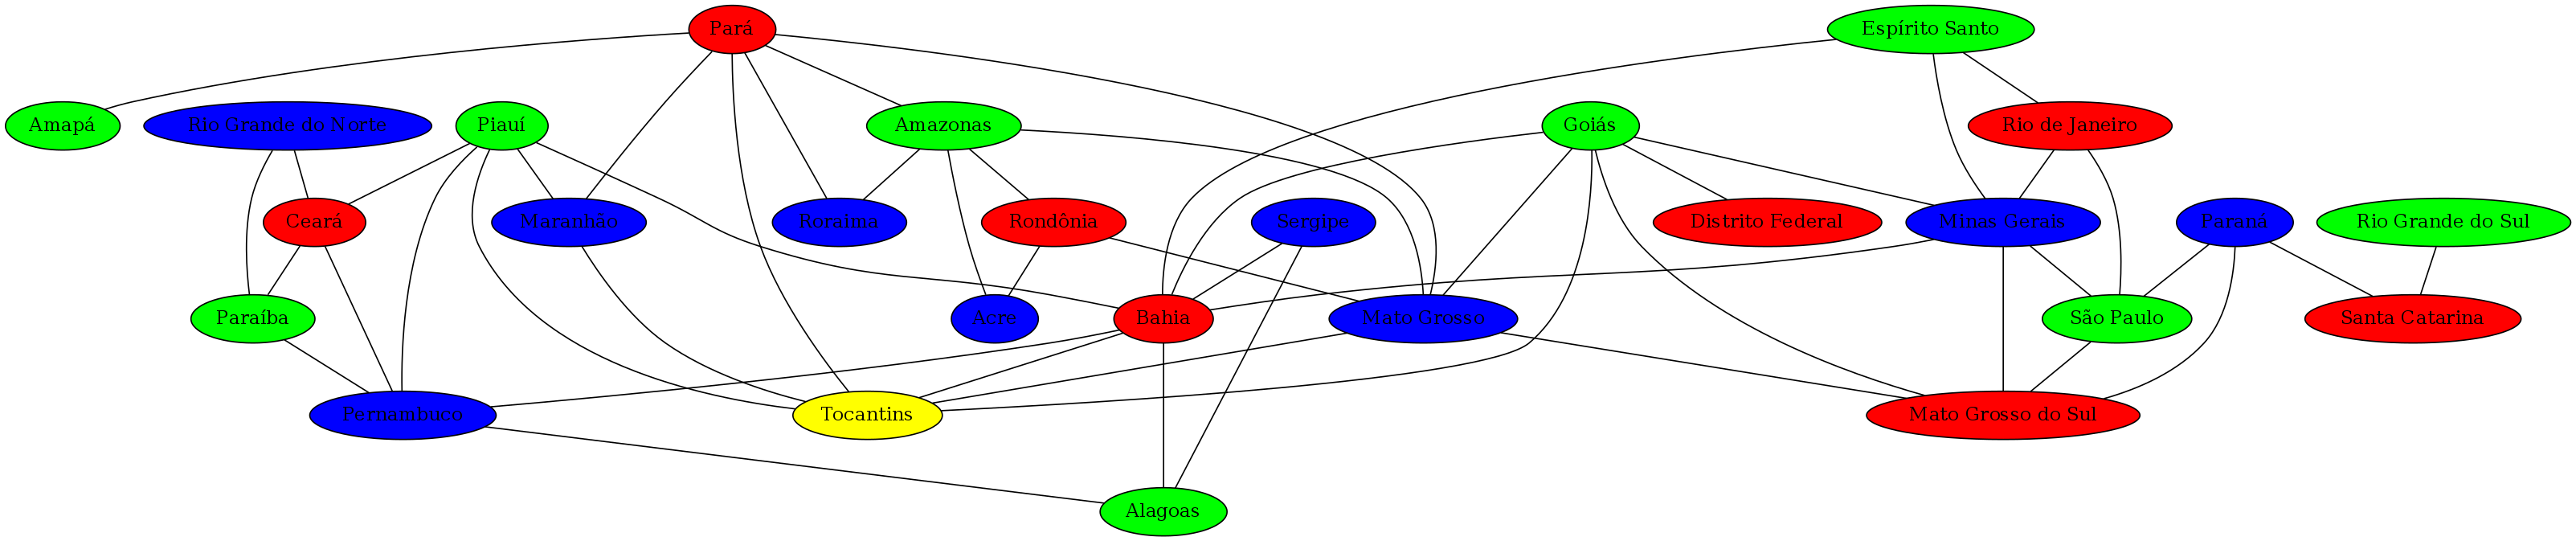

In [3]:
print("Colorindo mapa do Brasil")
color_graph(graph_brasil)
draw(graph_brasil, show='ipynb')

Colorindo mapa dos EUA


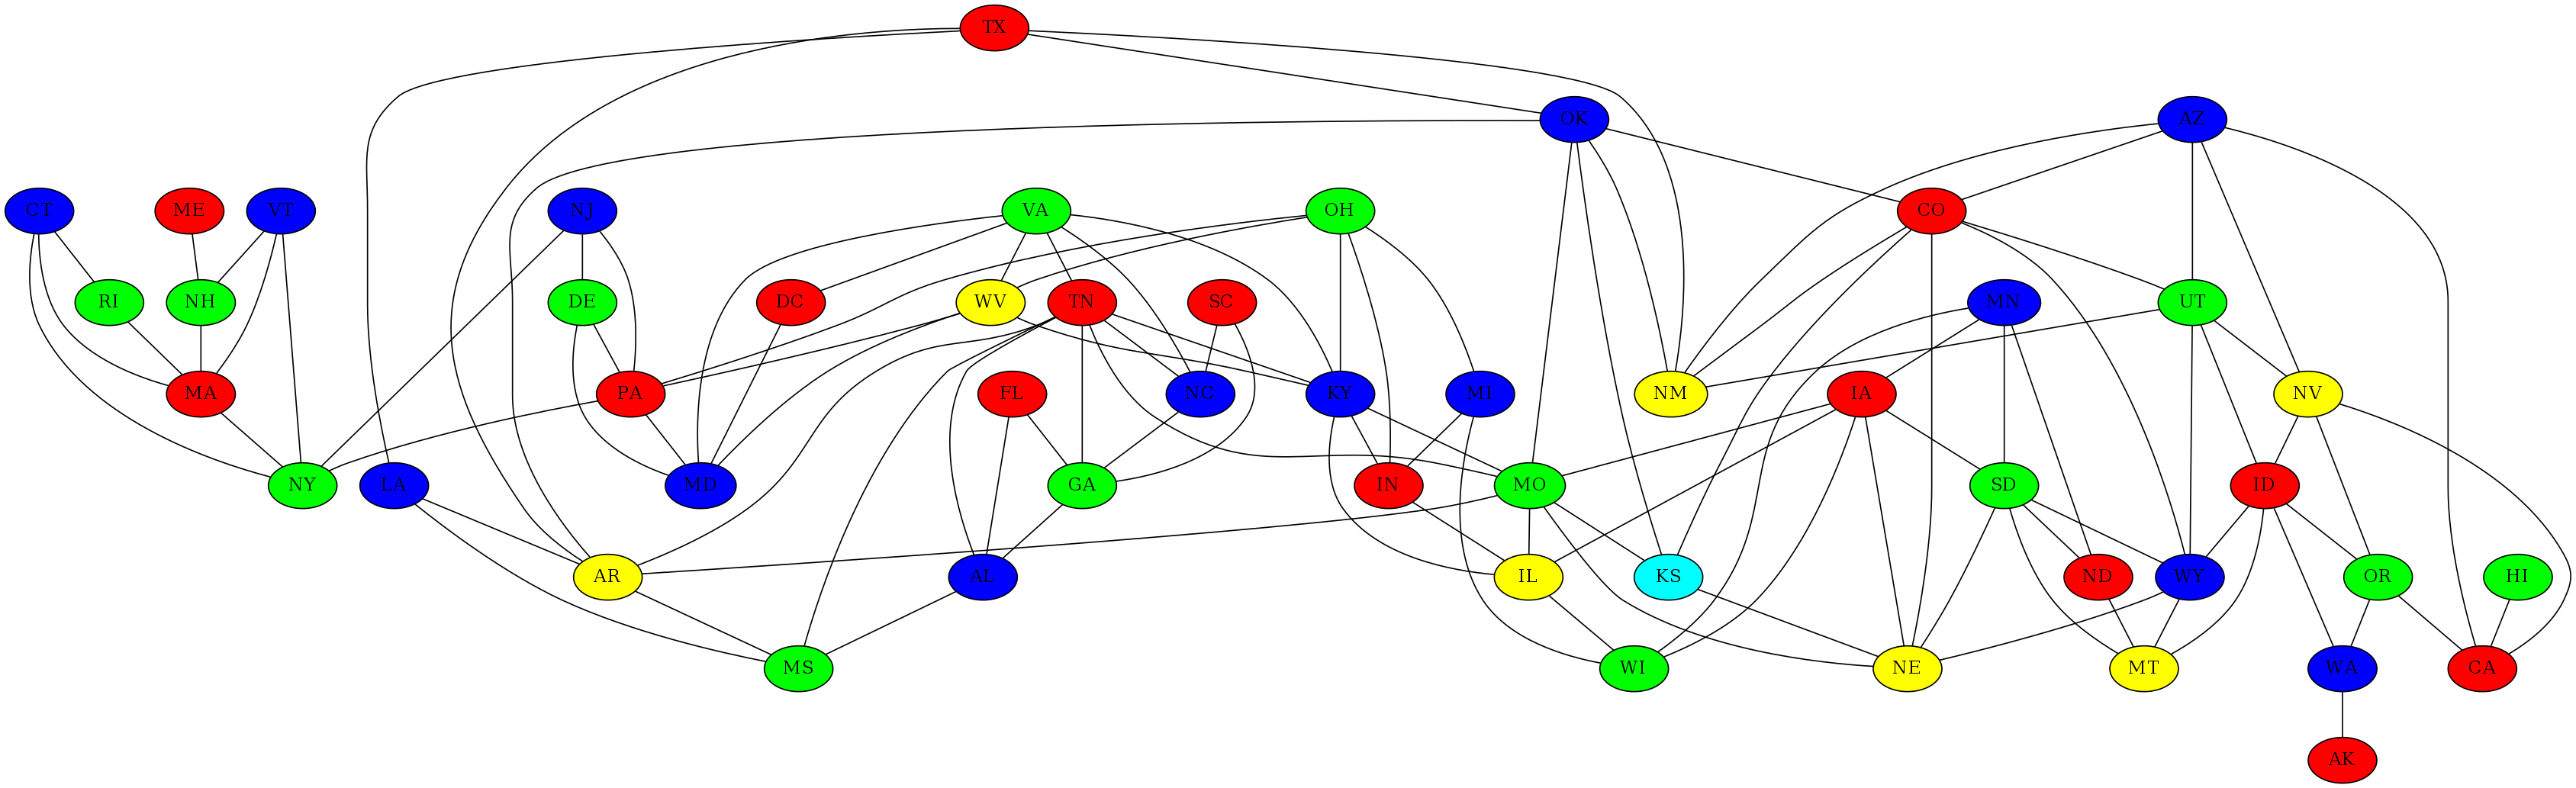

In [4]:
print("Colorindo mapa dos EUA")
color_graph(graph_usa)
draw(graph_usa, show='ipynb')

Colorindo mapa da Europa


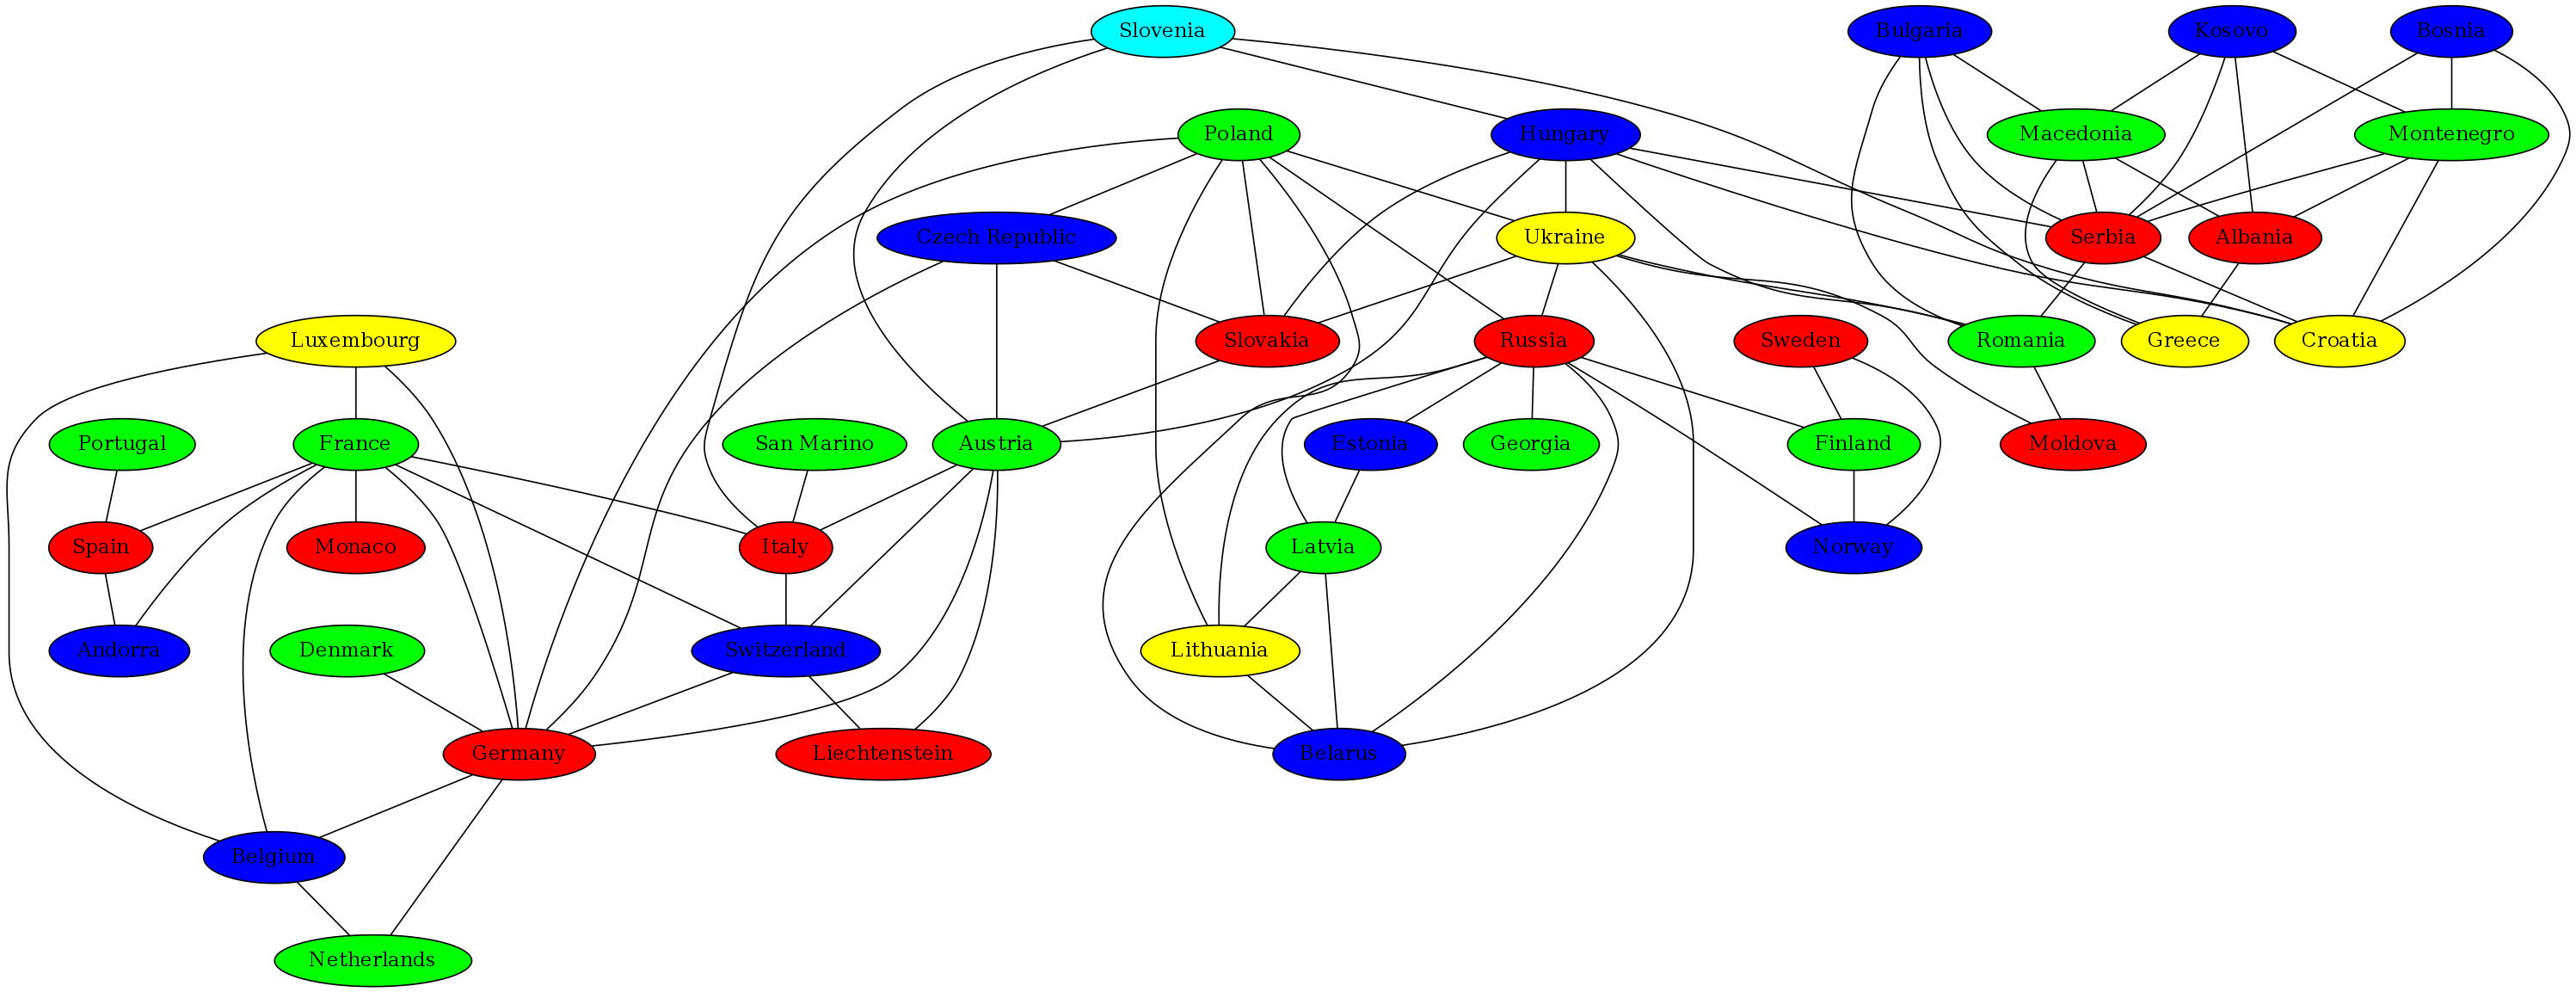

In [5]:
print("Colorindo mapa da Europa")
color_graph(graph_europe)
draw(graph_europe, show='ipynb')

-- Análise dos resultados aqui --